### Data Preprocessing

In [92]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [93]:
# Load dataset
data = pd.read_pickle("./data/data_pkls/nasdaq100.pkl")
data .head()
data['GOOG']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-01-11,144.895004,146.660004,142.214996,143.669998,143.669998,17471100.0
2024-01-12,144.339996,144.740005,143.360001,144.240005,144.240005,13995200.0
2024-01-16,143.429993,145.839996,143.056000,144.080002,144.080002,19198900.0


In [94]:
data.shape

(15618, 606)

In [95]:
#check features about companies
data.columns.get_level_values(1).unique()

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

<Axes: xlabel='None-None', ylabel='Date'>

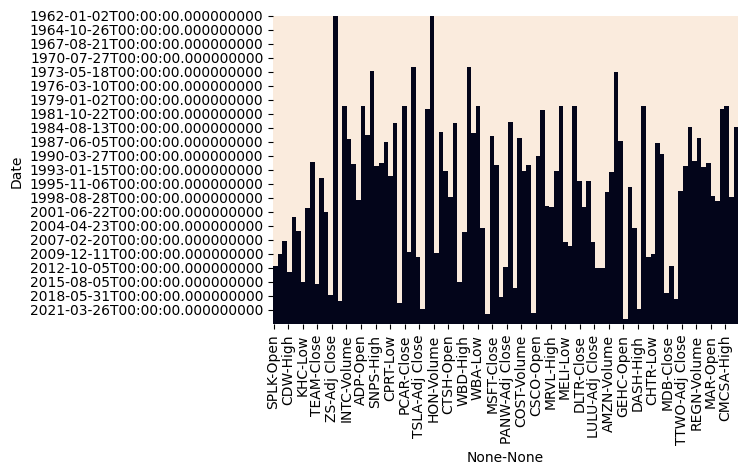

In [96]:
#Check for Missing values

plt.figure(figsize=(6,4))
sns.heatmap(data.isnull(),cbar=False)

In [99]:
#Filter data by a single ticker and drop missing values for that ticker
ticker = 'AAPL'
single_ticker = data.loc[:, [ticker]]

#if we want to filter by date
#single_ticker.loc[single_ticker.index >= dt.datetime.strptime("2020-01-01", "%Y-%m-%d")]

single_ticker.dropna(inplace=True)
single_ticker.head()

AAPL                                                     
                Open      High       Low     Close Adj Close       Volume
Date                                                                     
1980-12-12  0.128348  0.128906  0.128348  0.128348  0.099319  469033600.0
1980-12-15  0.122210  0.122210  0.121652  0.121652  0.094137  175884800.0
1980-12-16  0.113281  0.113281  0.112723  0.112723  0.087228  105728000.0
1980-12-17  0.115513  0.116071  0.115513  0.115513  0.089387   86441600.0
1980-12-18  0.118862  0.119420  0.118862  0.118862  0.091978   73449600.0

In [58]:
trainingData['AAPL']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-01-11,186.539993,187.050003,183.619995,185.589996,185.589996,49128400.0
2024-01-12,186.059998,186.740005,185.190002,185.919998,185.919998,40444700.0
2024-01-16,182.160004,184.259995,180.929993,183.630005,183.630005,65603000.0


In [66]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler(feature_range = (0, 1))
training_data = mm.fit_transform(trainingData)

In [67]:

# Getting the inputs and outputs

x_train = training_data[0:1257]
y_train = training_data[1:1258]

print(x_train.shape)
print(y_train.shape)

(1257, 606)
(1257, 606)


In [65]:
# reshaping

x_train = np.reshape(x_train, (1257, 606, 606))

print(x_train.shape)

ValueError: cannot reshape array of size 761742 into shape (1257,606,606)

In [69]:

# importing the keras libraries and packages

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [70]:
# initializing the model
model = Sequential()

# adding the input layer and the LSTM layer
model.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# adding the output layer
model.add(Dense(units = 1))

# compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# fitting the RNN to the training data
model.fit(x_train, y_train, batch_size = 32, epochs = 200)



Epoch 1/200

40/40 [==============================] - 7s 126ms/step - loss: nan
Epoch 2/200
40/40 [==============================] - 6s 156ms/step - loss: nan
Epoch 3/200
40/40 [==============================] - 7s 168ms/step - loss: nan
Epoch 4/200
40/40 [==============================] - 6s 157ms/step - loss: nan
Epoch 5/200
40/40 [==============================] - 6s 156ms/step - loss: nan
Epoch 6/200
40/40 [==============================] - 7s 179ms/step - loss: nan
Epoch 7/200
40/40 [==============================] - 6s 155ms/step - loss: nan
Epoch 8/200
40/40 [==============================] - 8s 193ms/step - loss: nan
Epoch 9/200
40/40 [==============================] - 8s 191ms/step - loss: nan
Epoch 10/200
40/40 [==============================] - 8s 197ms/step - loss: nan
Epoch 11/200
40/40 [==============================] - 7s 180ms/step - loss: nan
Epoch 12/200
40/40 [==============================] - 8s 191ms/step - loss: nan
Epoch 13/200
40/40 [==========================

KeyboardInterrupt: 